# Getting started with HaskellR

## Set up HaskellR

In [18]:
:ext QuasiQuotes
import qualified H.Prelude as H
H.initialize H.defaultConfig

## Doing things in R

In [3]:
-- print output
[rprint| lm(mpg ~ wt, data = mtcars) |]


Call:
lm(formula = mpg ~ wt, data = mtcars)

Coefficients:
(Intercept)           wt  
     37.285       -5.344

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeAAAAHgCAMAAABKCk6nAAADAFBMVEUAAAABAQECAgIDAwMEBAQFBQUGBgYHBwcICAgJCQkKCgoLCwsMDAwNDQ0ODg4PDw8QEBARERESEhITExMUFBQVFRUWFhYXFxcYGBgZGRkaGhobGxscHBwdHR0eHh4fHx8gICAhISEiIiIjIyMkJCQlJSUmJiYnJycoKCgpKSkqKiorKyssLCwtLS0uLi4vLy8wMDAxMTEyMjIzMzM0NDQ1NTU2NjY3Nzc4ODg5OTk6Ojo7Ozs8PDw9PT0+Pj4/Pz9AQEBBQUFCQkJDQ0NERERFRUVGRkZHR0dISEhJSUlKSkpLS0tMTExNTU1OTk5PT09QUFBRUVFSUlJTU1NUVFRVVVVWVlZXV1dYWFhZWVlaWlpbW1tcXFxdXV1eXl5fX19gYGBhYWFiYmJjY2NkZGRlZWVmZmZnZ2doaGhpaWlqampra2tsbGxtbW1ubm5vb29wcHBxcXFycnJzc3N0dHR1dXV2dnZ3d3d4eHh5eXl6enp7e3t8fHx9fX1+fn5/f3+AgICBgYGCgoKDg4OEhISFhYWGhoaHh4eIiIiJiYmKioqLi4uMjIyNjY2Ojo6Pj4+QkJCRkZGSkpKTk5OUlJSVlZWWlpaXl5eYmJiZmZmampqbm5ucnJydnZ2enp6fn5+goKChoaGioqKjo6OkpKSlpaWmpqanp6eoqKipqamqqqqrq6usrKytra2urq6vr6+wsLCxsbGysrKzs7O0tLS1tbW2tra3t7e4uLi5ubm6urq7u7u8vLy9vb2+vr6/v7/AwMDBwcHCwsLDw8PExMTFxcXGxsbHx8fIyMjJycnKysrLy8vMzMzNzc3Ozs7Pz8/Q0NDR0dHS0tLT09PU1NTV1dXW1tbX19fY2NjZ2dna2trb29vc3Nzd3d3e3t7f39/g4ODh4eHi4uLj4+Pk5OTl5eXm5ubn5+fo6Ojp6enq6urr6+vs7Ozt7e3u7u7v7+/w8PDx8fHy8vLz8/P09PT19fX29vb39/f4+Pj5+fn6+vr7+/v8/Pz9/f3+/v7////isF19AAAgAElEQVR4nO2dB5wURfbHyzvPO8MZMeec9VTOSNpIWjIIiEhWsmQkKSCSQQTFQJQcBQHJySXnHJa4LGwsT5C/LArI/Pu9qo5T3V07OzvAbv0+MFPdXVsdvtPdFV69RwJK+VrkUh+AUt5KAc7nUoDzuRTgfC4FOJ9LAc7nUoDzuRTgfC4FOJ9LAc7nUoDzuRTgfC4FOJ9LAc7nCgXw779n//G7lM6clcsnW97vsuX9Gd7yzlzm5f1+TrQyZMCU/t8fVEr/+10u3+lzcvl+OSOX79R5uXw0Wy7byQvhLe/Xi+Et75eAaK0CrAArwEwKsIsUYLEUYLcTUYCFUoDdpAArwCAF2EUKsFgKsNuJKMBCKcBuUoAVYJAC7CIFWCwF2O1EFGChFGA3KcAKMEgBdpECLJYC7HYiezbJZMsa22Or9rXtgGP1mBbjHDkV4MsLcA1CErIoTfqw+hRcHvPcs0ME2V4mhPybXEVIW0oTS5EPM9nqttrqj+05tQu4cMRercRt1rXbqsR1zLKuUIBdFGbAyzVCZBqlpbWv+dryHlieY8tyvF18txPE0CAapX2+v5ImHaP0bi15Lx1XnPQ2smfTj7SV6zsRUjXDLATKH2Yt9eS6qZlSR6gAiyUEfKQ8iV7F0wsatEuiCIO0o6nw1UFbGwuJh21/1ERb08kETJLZVyFCPmOAD8PisqwOcZW3dIyrvI/C4vvwMWVOxVrrWSGw2NBa6luE3HVM4jzGEtIoyz+bAoxqo13mUiy5WkvGUPoMXPkBDMBIStMZvN3WPwLmcUSow8Cx1SpIfjdM+3he+18Gy2oMH73hIxULKa+lRlgK3QybmvufRhrkmyBxvgow6G24XCyJFz9pKnJaS+mSN0gT7UbJZODSrH9UW1vRQgx4W0Xto3pqUe1z60P6Svo1IUX3JWipz2GRPTH21y/Z31roCthU2/809kG+fhLnWwABJ7cp08/xcNOed6QZS06GK5cRD58NtMUO2rdWM8K7j9THHHvGJOL3gZqk/jEh31L0Ae3z1sHrGt7PVryo/a+k1a8S02n6mC+P/AzrxM9h9qgots73POAIN0ucryzg6X0WS+W7AgDX0S7NQMfaqR8MSefJVoTMZK/c0fx6d6fsXcweq4nadx/97zKdbJ94SvuIo0/gwvP/5WuXDyhZH4Du6NrnqPa19tU7Xv5BfHhb2B9U8D2Po31brZE5X0nAn2o7HS+T8QoADBewomDLsh5TjPQXkOmjIzQDvj/VVhTD676YJvavgY9briDATBMq2BZf30D3NSw9FJ+rUZns/blBfHhp7C/i/E8kvLVo+EWXl8l4BQCurJ1Ll+ANMwGpsVQEr3OJneUIuQV6Mu5hF74W+4rSs6WJAQcTh1fv9yMguYiuh6+vXI5vZSWokfVx2WpReAFDc62uTMYrAPCuKqRhavCGmtY7kyZ9+A48X+FxDlc7hYP6J/sy6kXegG/Dz6u1/3D9SOMf2d2JFaSVLsd38gKd2WGyxImEF7DW7i++QybjFQBY+0hfvj1oQ3P7k/GXM/DUKgss/kvpcY7sX+yrrJYhq0t0rT0uj2hdixvzRHH4qEnZYtefSkZ96XZ8l6onKzNFLt8VAfhoFCENnSe0L4r1WeknciYGbjp8Jr+jV7LIO/xbyzBE+yqfSjy1LYsniuJnuSTM38zr+Pbce/NwqRNRPVliAeDBeLmDmiJJ1j5CdgeXWoxZj/A7teOBGS2gj6uGluE9BH2DF98E1sz6OTGlFFtRDu/hZV7Hd5WW4VuZE1GAxQLAffFqv+eVbcd7CTCOQLY+CZ/fG+3d97LokIRWR7QcQwlUxl/y4Psc9IssHLGfsoY2/iCyxn3q2cbtBbnulDkRBVgsALwfL3bVxvFdM9yyxXAi3bfcTKDWbGKbx3NkfRxTe28WsenaV9n3o2wPZRjLnTXj+yzDFcV8Dw/rYc/InIgCLBYAno1XG2q2n7nkMkaJXuuDr11LbTnami/DcdMW4d9T2BertMGORkNnFpnlf3za7+lvMoMNCrCLAPAncLHXwodr295kprWESZdkSF1/J3vMch2YtJ7SvwU9mG3arZdVG2/sLf7Hd3KbzBACvWSAt74bI2ikX2aA52gXuzitToIG5U1Btwdpg62bDQPnsFr0f5BZK55jnZYekO7Nl5Avq9VfAzWs1vzO9j2+y33AH6qeTmOVyw4w7froy6toUq24Fvrw0NooUsZudROvI2LDiJhCvvo4BbZpfdrBTK2qx37CB44LlfrJ5/guc8AZ1t+4qcsMMPQVlrOthZ7EJtYVmw087IHUnJDrcHGjnqOZNGDyxf5i5sJx7+O7zAFTGAGfGLT2MgPcEy70Uedh297HiwwgUV1j6+w3a8vGoNpWbWG4X180f0W/gXcvS6/mf58xX9hbebkD3l4ndkDw2ssM8HdwoW0tJDDpsHUvpBa3cqoy0khiN/G+gaPSacrcXfQEEejBr94RraaHR8EX7wZP1X5TdQTHd7kDviJq0Rk1CfnetjbzyyaODv6jLQrfh1wKw8czBia48fcS/REvfkSvTDTTj9zCE90orUvI3St4+RNh3TYaJAXYRTkz2UkV2astGbreSKdXYlgq/DzAQq5L7yTYCJ1YZA+k+gsBD6VfvXATT289UEKrdu75euFnbFmvgU7AjcEHoQC7KPdms4O0Kz7rBF8oz/mMpZntTXL8/TkW0smQihYCHjKN371vx79BEnZvPUZPLJrEt+lPjtQYQt4VHIUC7CJpwL/VIZV2irZAC+9uUnQppPVRoo+yDtCfLOhmYM6MqoR0xmdAWSHgOY14ogeMKdemdLexKUb/BdH02UtER6EAu0gaMHRjVRJt4S3fePpTFGnC0nW1/8Wt1S29pj2LkFdn
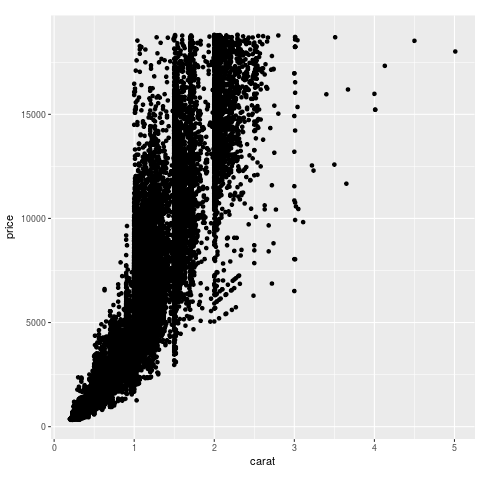

In [5]:
-- plot stuff
-- we just require ggplot2 as we do everything directly in R
[rgraph| 
  require(ggplot2)
  ggplot(diamonds, aes(carat, price)) + geom_point() + theme(aspect.ratio = 1) |]

Assignment also works as usual:


In [6]:
[rprint| fact <- function(n) if(n == 0) 1 else n * fact(n - 1) 
  fact(10) |]

[1] 3628800

Call fact again...

In [7]:
[rprint| fact(10) |]

R Runtime Error: Error in fact(10) : could not find function "fact"

The embedded R interpreter is stateful, but for global assignment we need to use <<-

In [8]:
[r| fact <<- function(n) if(n == 0) 1 else n * fact(n - 1) |]

0x00007f5ed219fcf0

In [9]:
[rprint| fact(25) |]

[1] 1.551121e+25

## Fine, but my data are in Haskell ... how do I ship them over to R?

The \_hs suffix is used to splice values from Haskell into the R code:

In [10]:
-- a Haskell list
xs = [1..10] :: [Double]
xs

[1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0]

In [11]:
[rprint| mean(xs_hs) |]

[1] 5.5

We can even use functions defined in Haskell in R:

In [12]:
import Data.Int
fact :: Int32 -> Int32
fact 0 = 1
fact n = n * fact (n - 1)

factR x = return $ fact x :: H.R s Int32

In [13]:
n = 6 :: Int32
[rprint| factR_hs(n_hs) |]

[1] 720

## What if I want to use results from R computations in Haskell?

In [15]:
get_normals :: Double -> H.R s [Double]
get_normals n = do
   H.dynSEXP <$> [r| rnorm(n_hs) |]
result <- H.runRegion $ get_normals 4

result

[-0.26079841887086735,0.3001814161724038,-1.8803822700773822,0.1581619369977019]

Now these are just normal Haskell values you can work with:

In [16]:
:t result

result :: [Double]